# **Dataset Selection**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("diamonds.csv")
df.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [ ]:
df.shape

(53940, 11)

In [ ]:
columnas_interes = ['x', 'y', 'z', 'price', 'carat']
medias = df[columnas_interes].mean()
print(medias)

x           5.731157
y           5.734526
z           3.538734
price    3932.799722
carat       0.797940
dtype: float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


## **Overview**

In [ ]:
print(f"Overview The Dataset:")
print(f"Rows: {df.shape[0]} Columns: {df.shape[1]}")
df.head().style.set_properties(**{"background-color": "#6fa8dc","color":"black","border": "2.5px solid black"})

Overview The Dataset:
Rows: 53920 Columns: 11


* price price in US dollars (\$326--\$18,823)

* carat weight of the diamond (0.2--5.01)

* cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

* color diamond colour, from J (worst) to D (best)

* clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

* x length in mm (0--10.74)

* y width in mm (0--58.9)

* z depth in mm (0--31.8)

* depth total depth percentage = z / mean(x, y) = 2z / (x + y) (43--79)

* Table width of top of diamond relative to widest point (43--95)

## **Correlations**

* The variables "x," "y," and "z" demonstrate a strong correlation with the target column, while "depth," "cut," and "table" exhibit a low correlation.

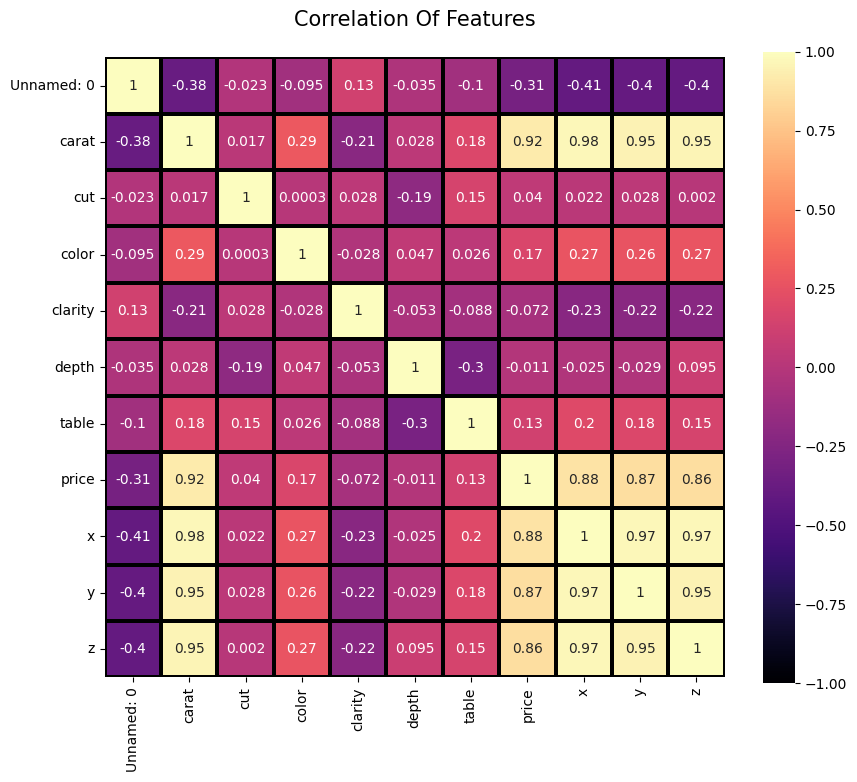

In [ ]:
catcol = ["color","clarity","cut"]
le = LabelEncoder()
for col in catcol:
        df[col] = le.fit_transform(df[col])
plt.subplots(figsize =(10, 10))
sns.heatmap(df.corr(), cmap = "magma", square=True, cbar_kws=dict(shrink =.82),
            annot=True, vmin=-1, vmax=1, linewidths=1.5,linecolor='black')
plt.title("Correlation Of Features\n", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

* Some datapoints exhibit distinct features that deviate significantly from the rest, potentially influencing the results of our regression model. These clear outliers will be dealth with throughout the implementation.



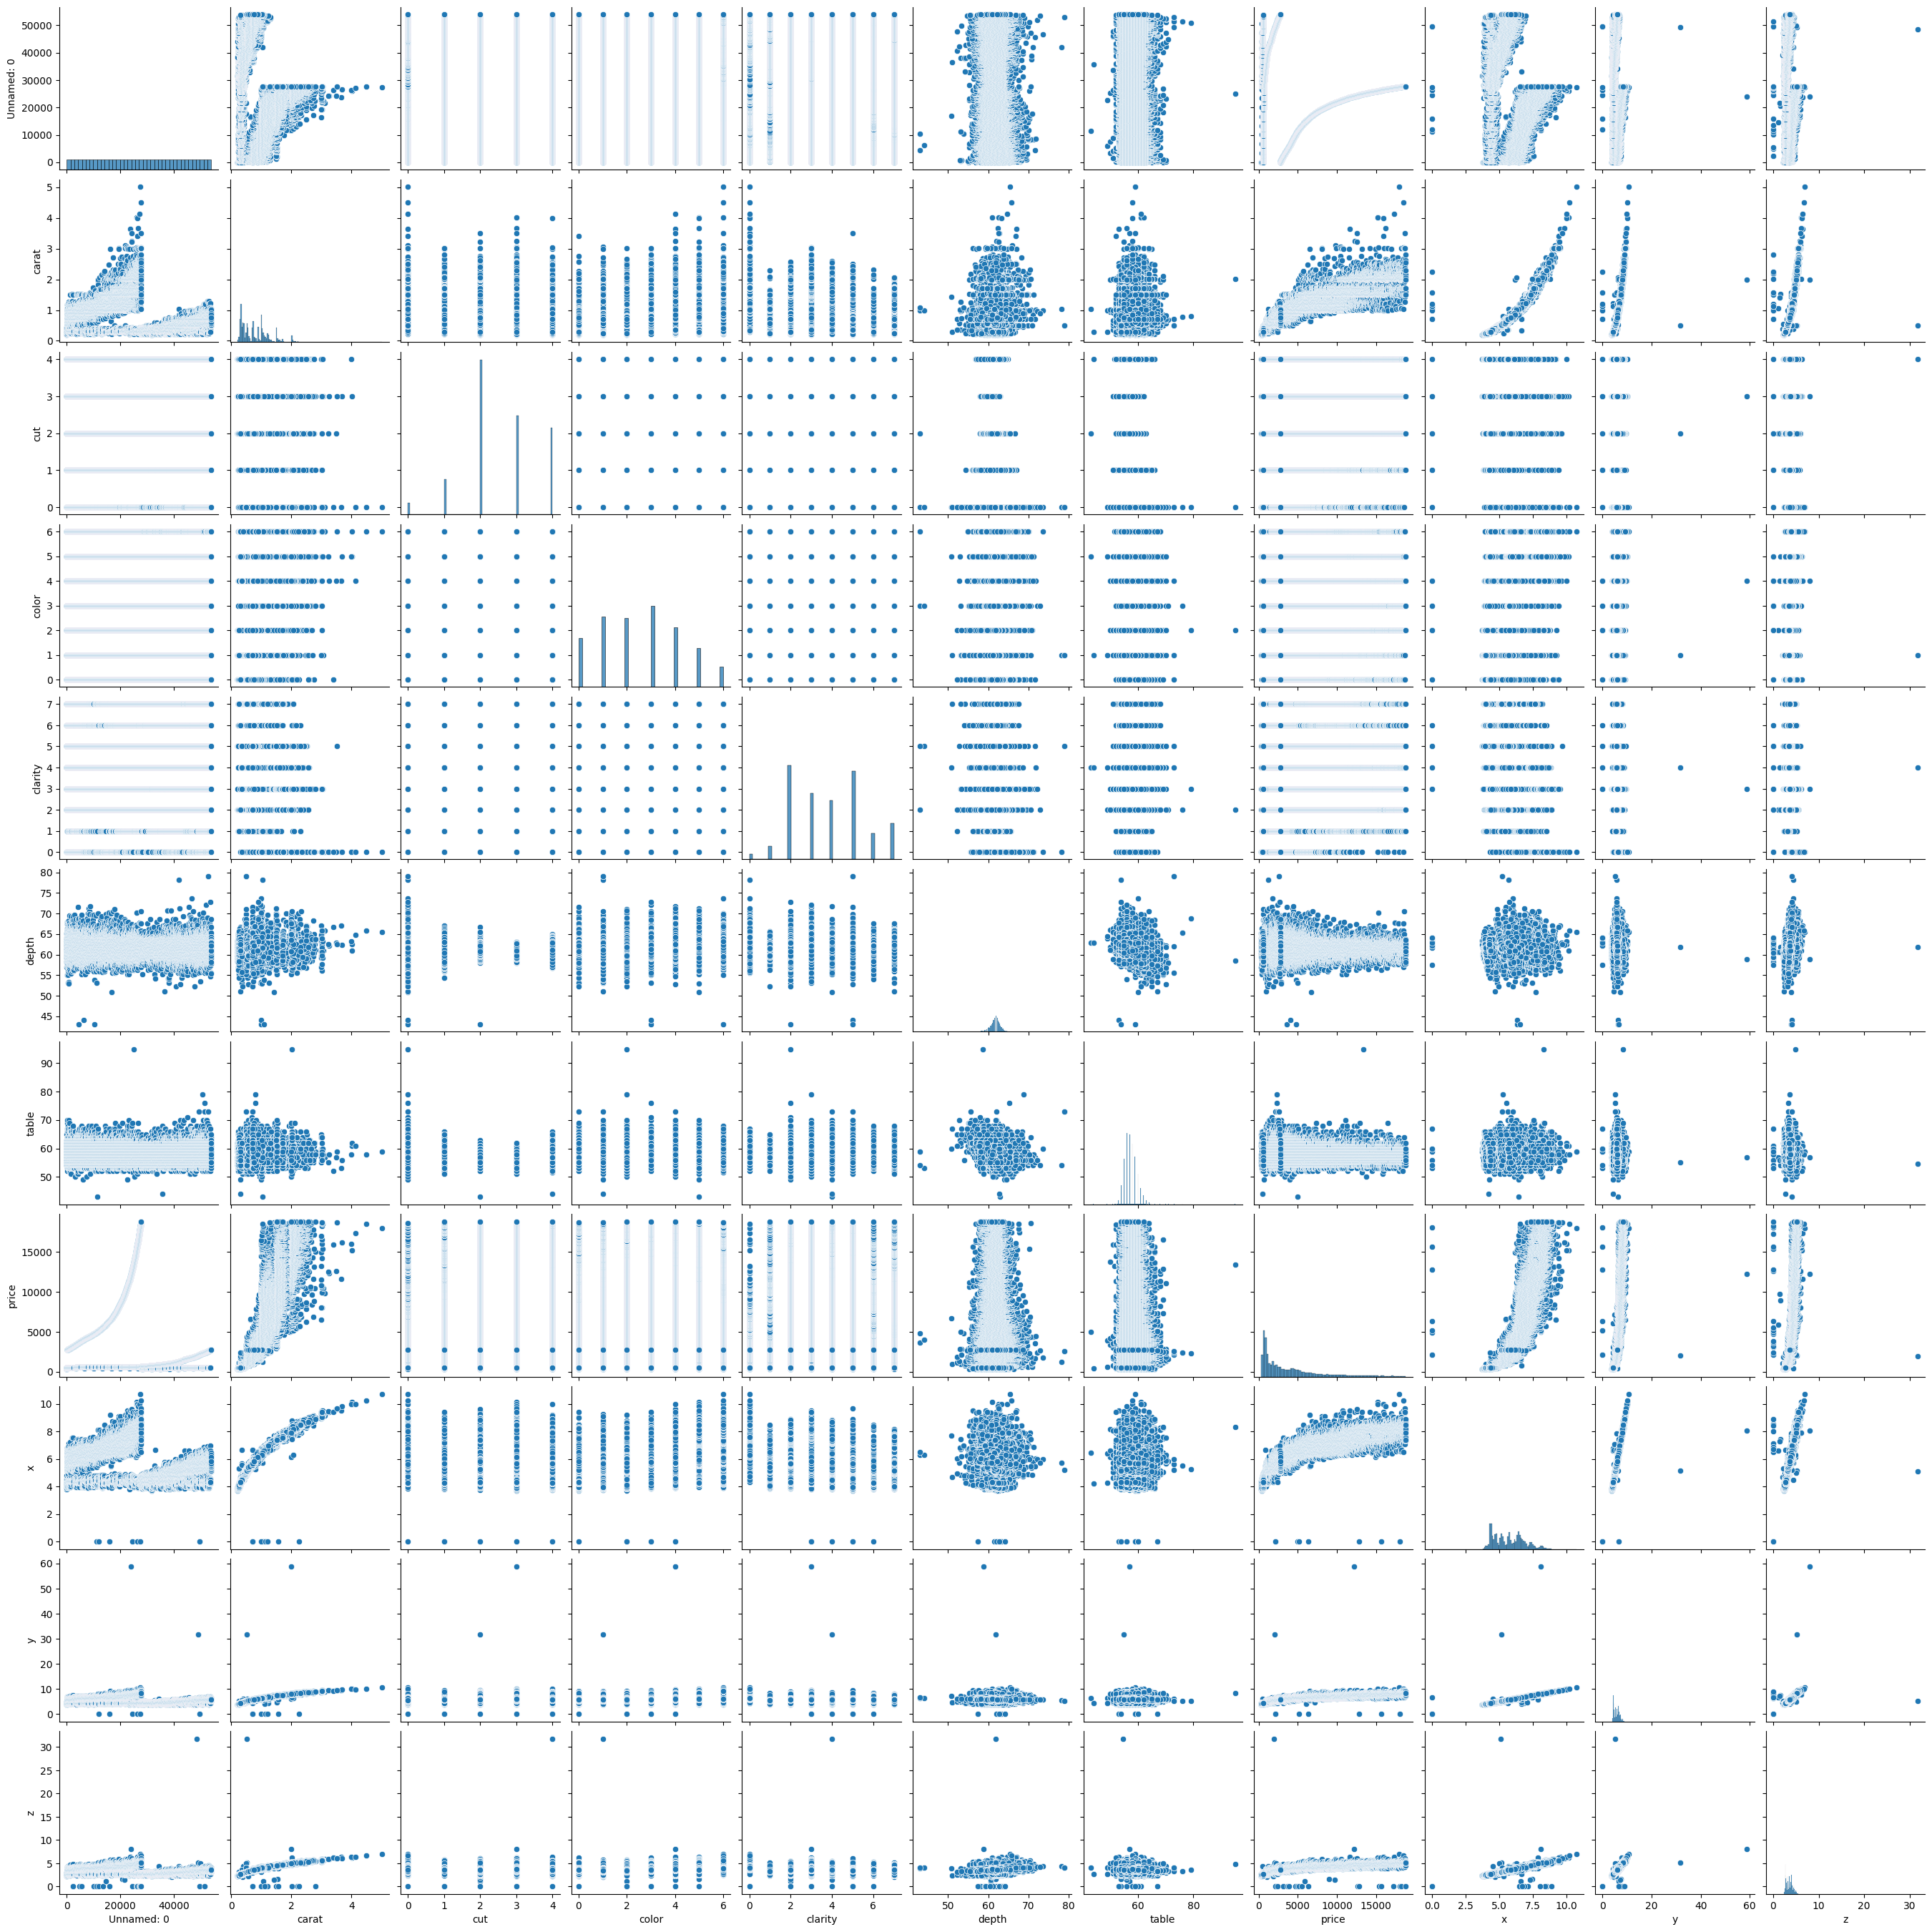

In [ ]:
sns.pairplot(df)

Text(0, 0.5, 'Price')

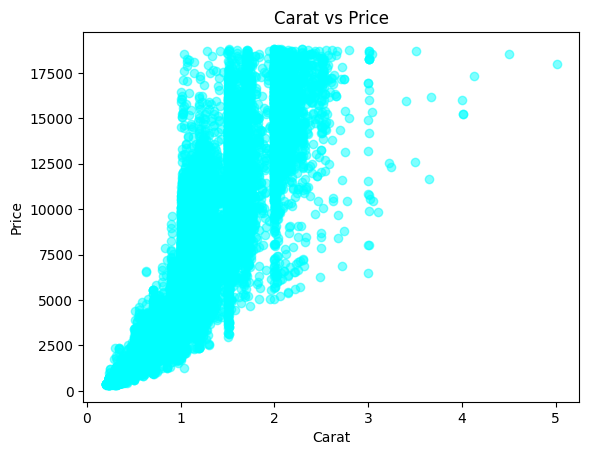

In [ ]:
plt.scatter(df['carat'], df['price'], color='cyan', alpha=0.5)
plt.title('Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price')

## **Price distribution**

* The distribution of prices appears to be skewed to the right, with the majority falling within the range of 326 to 10000, representing 90% of the datapoints, and a median of 2401. Additionally, there is a notable presence of high and medium-priced diamonds, which are associated with the rarest and nearly rare categories.

Let's have a look on the distribution of prices :


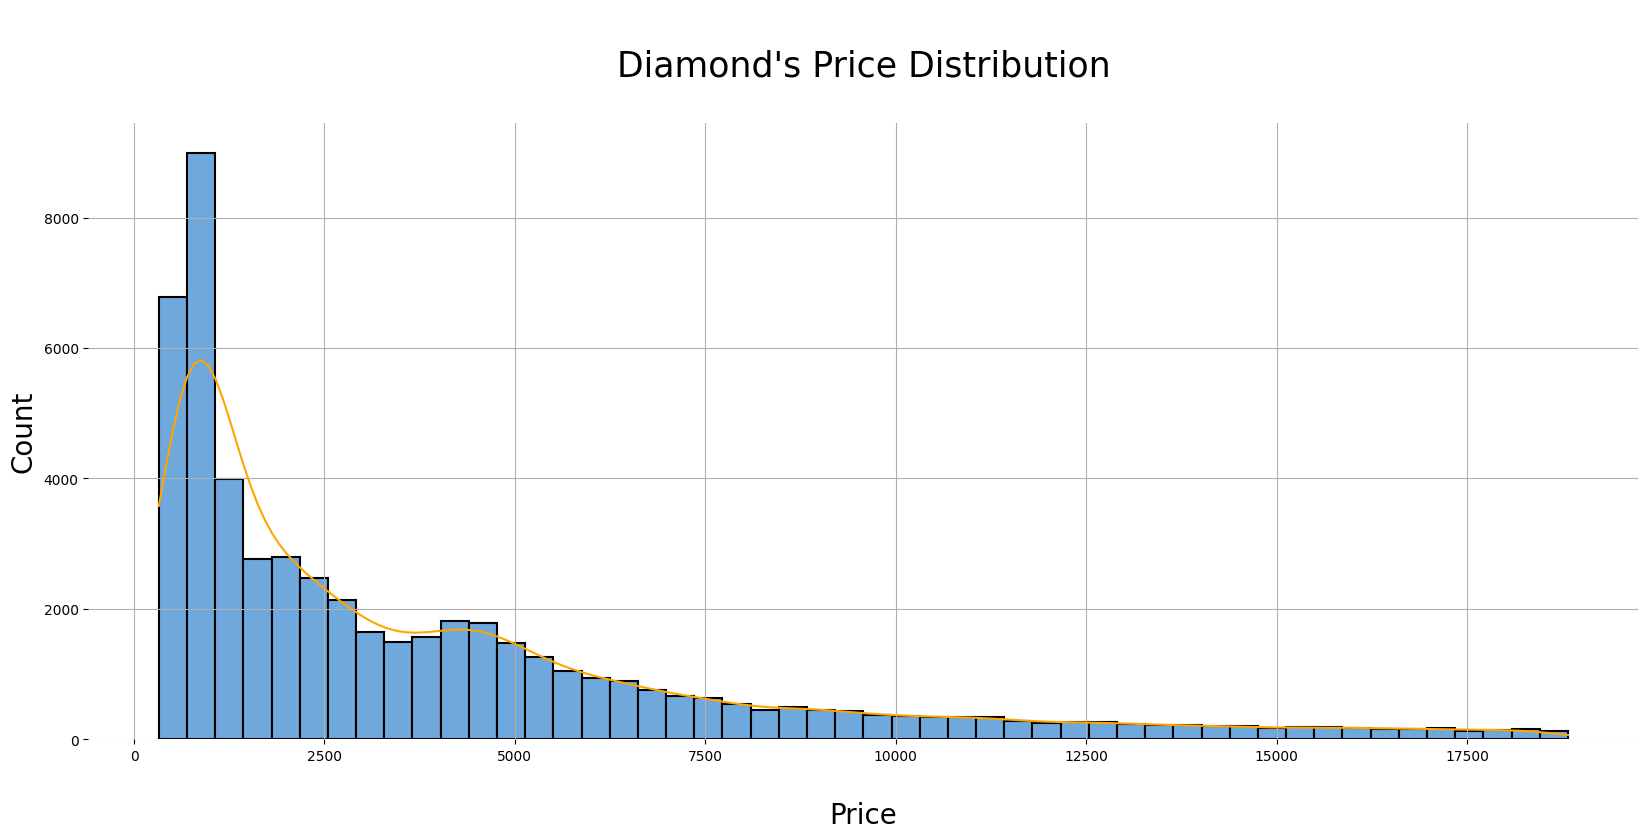

In [ ]:
print(f"Let's have a look on the distribution of prices :")
plt.subplots(figsize=(20, 8))
p = sns.histplot(df["price"], color= "#6fa8dc", kde=True, bins=50, alpha=1, fill=True, edgecolor="black", linewidth=1.5)
p.axes.lines[0].set_color("orange")
p.axes.set_title("\nDiamond's Price Distribution\n", fontsize=25)
plt.ylabel("Count", fontsize=20)
plt.xlabel("\nPrice", fontsize=20)
plt.yscale("linear")
plt.grid(True)
sns.despine(left=True, bottom=True)
plt.show()

Let's have a look at the distribution of prices :


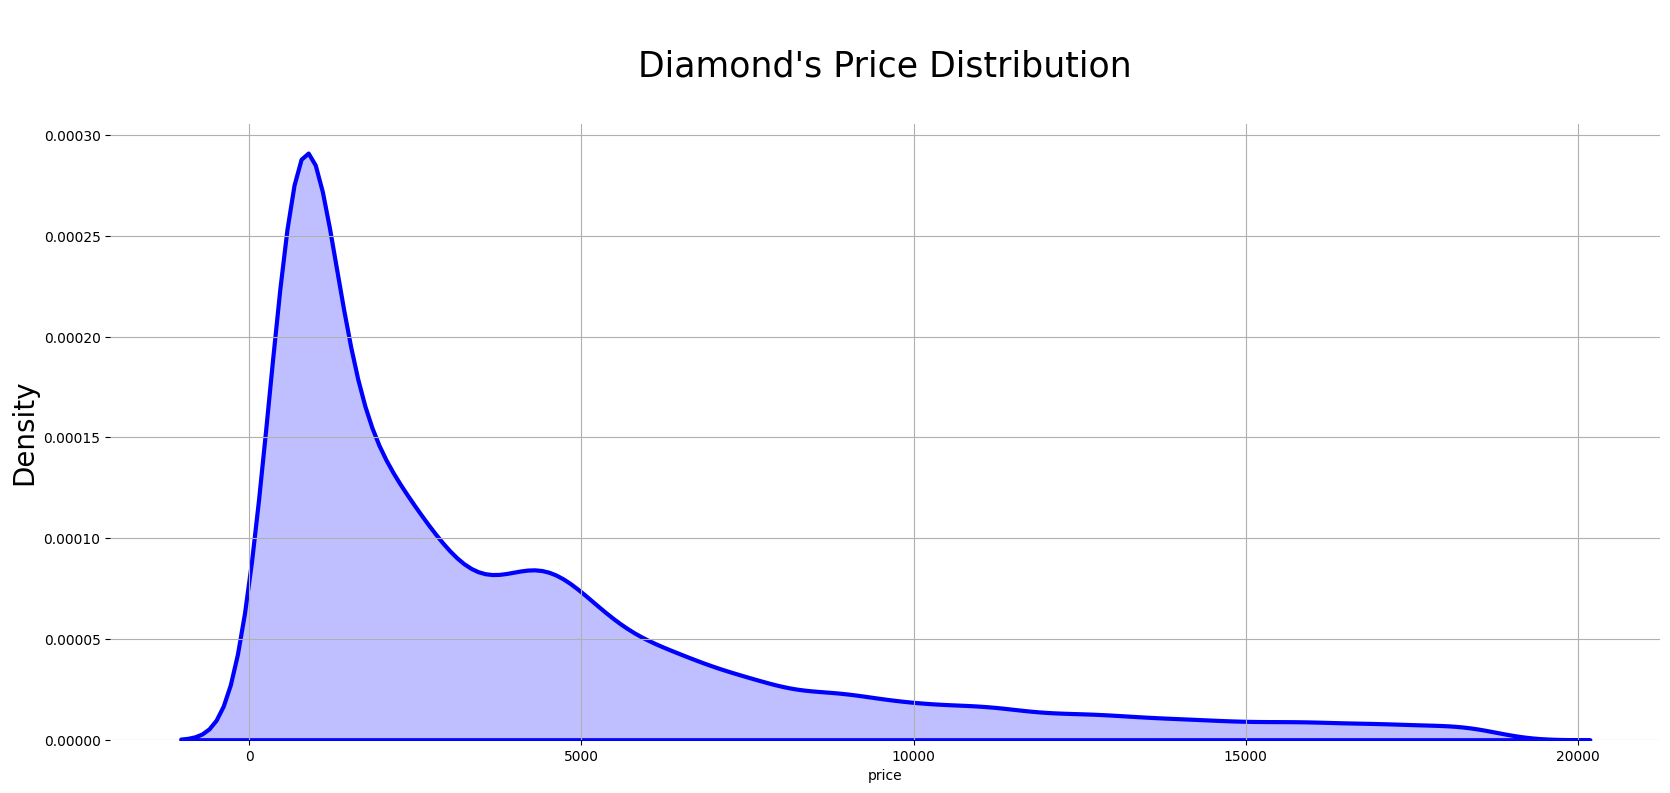

In [ ]:
print(f"Let's have a look at the distribution of prices :")
plt.subplots(figsize=(20, 8))
p = sns.kdeplot(df["price"], color="blue", fill=True, linewidth=3)
p.set_title("\nDiamond's Price Distribution\n", fontsize=25)
plt.ylabel("Density", fontsize=20)
plt.grid(True)
sns.despine(left=True, bottom=True)
plt.show()


## **Graphs of Measures and characteristics**

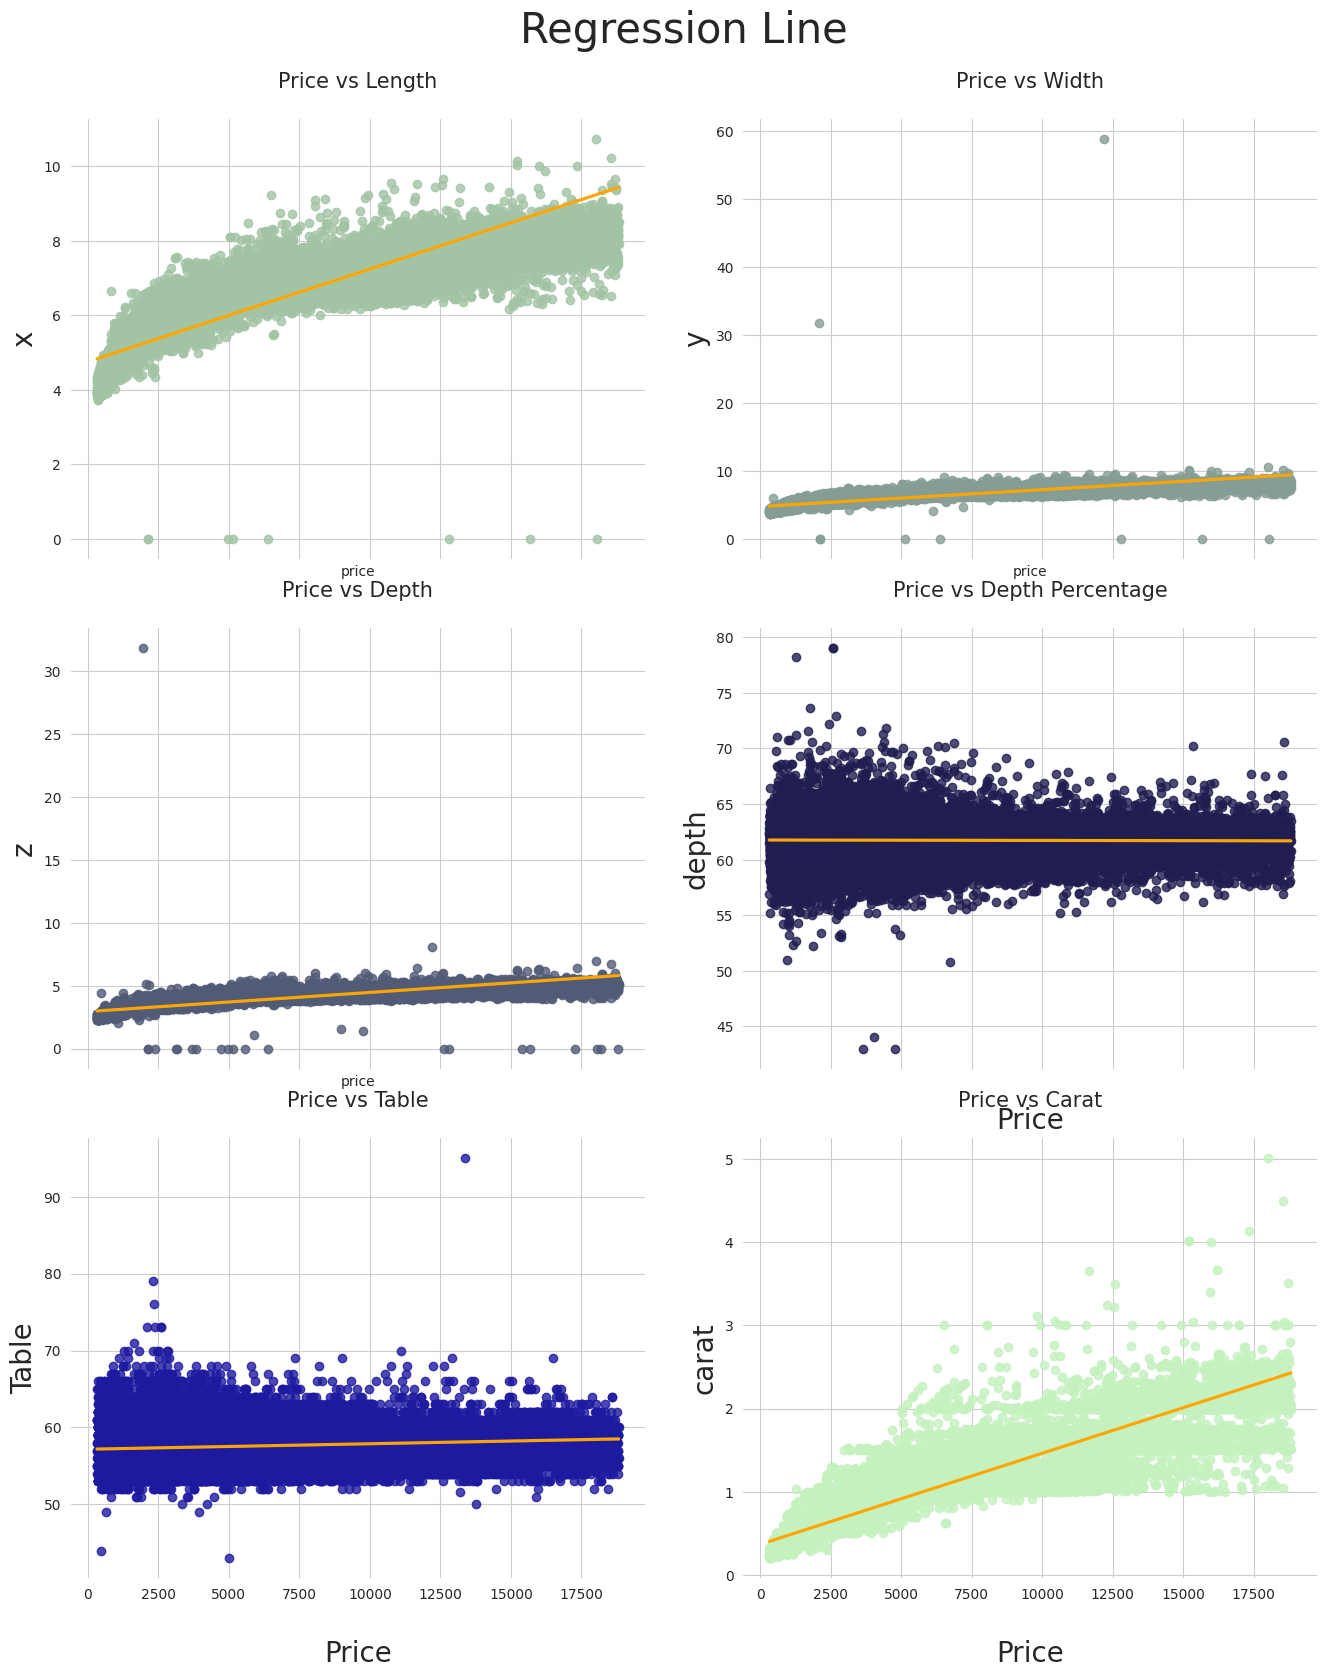

In [ ]:
_, axs = plt.subplots(3,2,figsize=(14,16),sharex=True)
plt.tight_layout(pad=4.0)
sns.regplot(x="price", y="carat", data=df, ax=axs[2,1], color="#C4F1BE", fit_reg=True, line_kws=dict(color= "orange"))
axs[2,1].set_title("Price vs Carat\n",fontsize=15)
axs[2,1].set_xlabel("\nPrice",fontsize=20)
axs[2,1].set_ylabel("carat",fontsize=20)
sns.regplot(x="price", y="x", data=df, ax=axs[0,0], color="#A2C3A4", fit_reg=True, line_kws=dict(color= "orange"))
axs[0,0].set_title("Price vs Length\n",fontsize=15)
axs[0,0].set_ylabel("x",fontsize=20)
sns.regplot(x="price", y="y", data=df, ax=axs[0,1], color="#869D96", fit_reg=True, line_kws=dict(color= "orange"))
axs[0,1].set_title("Price vs Width\n",fontsize=15)
axs[0,1].set_ylabel("y",fontsize=20)
sns.regplot(x="price", y="z", data=df, ax=axs[1,0], color="#525B76", fit_reg=True, line_kws=dict(color= "orange"))
axs[1,0].set_title("Price vs Depth\n",fontsize=15)
axs[1,0].set_ylabel("z",fontsize=20)
sns.regplot(x="price", y="depth", data=df, ax=axs[1,1], color="#201E50", fit_reg=True, line_kws=dict(color= "orange"))
axs[1,1].set_title("Price vs Depth Percentage\n",fontsize=15)
axs[1,1].set_xlabel("\nPrice",fontsize=20)
axs[1,1].set_ylabel("depth",fontsize=20)
sns.regplot(x="price", y="table", data=df, ax=axs[2,0], color="#1E1AA0", fit_reg=True, line_kws=dict(color= "orange"))
axs[2,0].set_title("Price vs Table\n",fontsize=15)
axs[2,0].set_xlabel("\nPrice",fontsize=20)
axs[2,0].set_ylabel("Table",fontsize=20)
plt.suptitle("Regression Line",fontsize=30, y=1.03)
sns.despine(left=True, bottom=True)
plt.show()

# **Model Selection**

## **Libraries**

In [ ]:
import pandas as pd
dfDiamonds = pd.read_csv("/content/diamonds.csv")

In [ ]:
dfDiamonds.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [ ]:
dfDiamonds.shape

(53940, 11)

## **Clean Data**

In [ ]:
dfDiamonds = dfDiamonds.drop(dfDiamonds[dfDiamonds['x']==0].index)
dfDiamonds = dfDiamonds.drop(dfDiamonds[dfDiamonds["y"]==0].index)
dfDiamonds = dfDiamonds.drop(dfDiamonds[dfDiamonds["z"]==0].index)
dfDiamonds = dfDiamonds.drop(columns='Unnamed: 0')

In [ ]:
dfDiamonds.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [ ]:
dfDiamonds.shape

(53920, 10)

## **First Model**

### **Libraries**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error
import math

### **Dataframe**

In [ ]:
df_Diamonds = dfDiamonds.copy()
df_Diamonds.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [ ]:
df_Diamonds.describe()

carat         depth         table         price             x  \
count  53920.000000  53920.000000  53920.000000  53920.000000  53920.000000   
mean       0.797698     61.749514     57.456834   3930.993231      5.731627   
std        0.473795      1.432331      2.234064   3987.280446      1.119423   
min        0.200000     43.000000     43.000000    326.000000      3.730000   
25%        0.400000     61.000000     56.000000    949.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5323.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53920.000000  53920.000000  
mean       5.734887      3.540046  
std        1.140126      0.702530  
min        3.680000      1.070000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

### **Clean Data**

In [ ]:
df_Diamonds = df_Diamonds[(df_Diamonds["depth"] < 75) & (df_Diamonds["depth"] > 45)]
df_Diamonds = df_Diamonds[(df_Diamonds["table"] < 80) & (df_Diamonds["table"] > 40)]
df_Diamonds = df_Diamonds[df_Diamonds["x"] < 30]
df_Diamonds = df_Diamonds[df_Diamonds["y"] < 30]
df_Diamonds = df_Diamonds[(df_Diamonds["z"] < 30) & (df_Diamonds["z"] > 2)]
print(df_Diamonds.shape)

(53907, 10)


### **Model**

In [ ]:
inputs = ['carat','z']
output= ['price']
print(df_Diamonds.columns)

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')


In [ ]:
scores_ = []
coefs_ = []
intercepts_ = []
for k in range(1000):
    dfTrain, dfTest = train_test_split(df_Diamonds, test_size= 0.2, random_state = k+1)
    lr = LinearRegression()
    lr.fit(dfTrain[inputs],dfTrain[output])
    scores_.append(lr.score(dfTest[inputs],dfTest[output]))
    coefs_.append(lr.coef_[0])
    intercepts_.append(lr.intercept_[0])

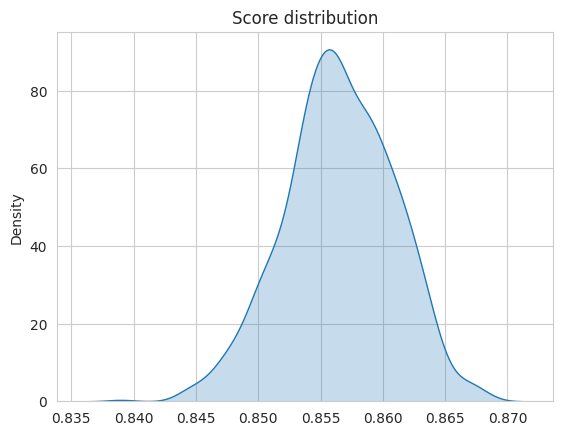

In [ ]:
sns.kdeplot(x=scores_, fill=True,)
plt.title('Score distribution')
plt.show()

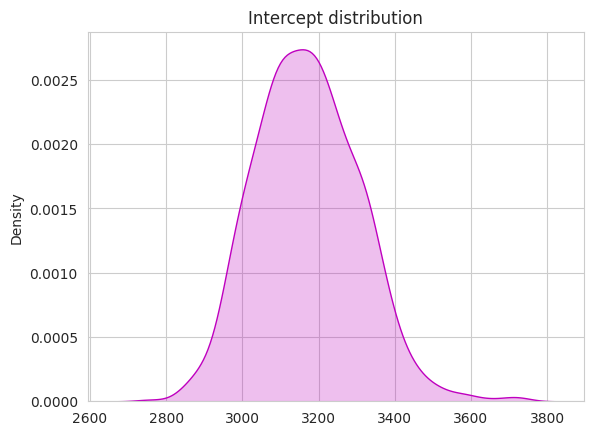

In [ ]:
sns.kdeplot(x=intercepts_, fill=True,color = 'm')
plt.title('Intercept distribution')
plt.show()

Text(0, 0.5, 'Z')

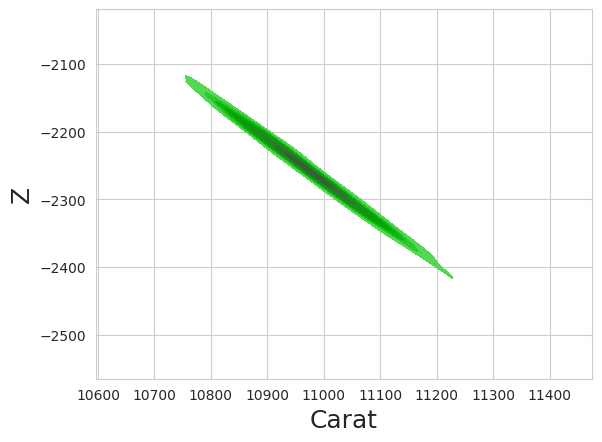

In [ ]:
P = np.array(coefs_)
sns.set_style('whitegrid')
sns.kdeplot(x=P[:,0], y=P[:,1], color='g', fill=True)
plt.xlabel('Carat', fontdict={'size':18})
plt.ylabel('Z', fontdict={'size':18})

In [ ]:
score_final = np.mean(np.array(scores_))
intercept_final = np.mean(np.array(intercepts_))
coefs_final = np.mean(np.array(coefs_), axis=0)
print(f'Final Score: {score_final}')
print(f'Final Intercept: {intercept_final}')
print(f'Final Coefficients: {coefs_final}')

Final Score: 0.8564691127522621
Final Intercept: 3170.4109826783056
Final Coefficients: [10976.82558277 -2258.9007348 ]


In [ ]:
new_model = LinearRegression()
new_model.coef_ = coefs_final
new_model.intercept_ = intercept_final

### **Metrics and Features**

In [ ]:
print(f'coefficients: {new_model.coef_}')
print(f'Intercept: {new_model.intercept_}')

coefficients: [10976.82558277 -2258.9007348 ]
Intercept: 3170.4109826783056


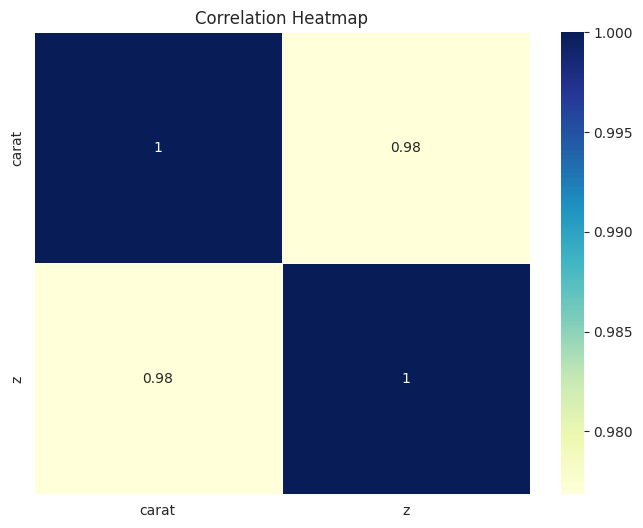

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(dfTrain[inputs].corr(), annot=True, cmap='YlGnBu', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
y_pred = new_model.predict(dfTest[inputs]).flatten()
y_real = dfTest[output].values
print(f'Score: {new_model.score(dfTest[inputs],y_real)}')
print(f'Mean Square Error (MSE): {mean_squared_error(y_real, y_pred)}')
print(f'Root Mean Square Error (RMSE): {math.sqrt(mean_squared_error(y_real, y_pred))}')
print()

Score: 0.8669998225295542
Mean Square Error (MSE): 2077644.9343312567
Root Mean Square Error (RMSE): 1441.403806825574



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


### **Graphs**

Text(0.5, 1.0, 'Diamonds Price')

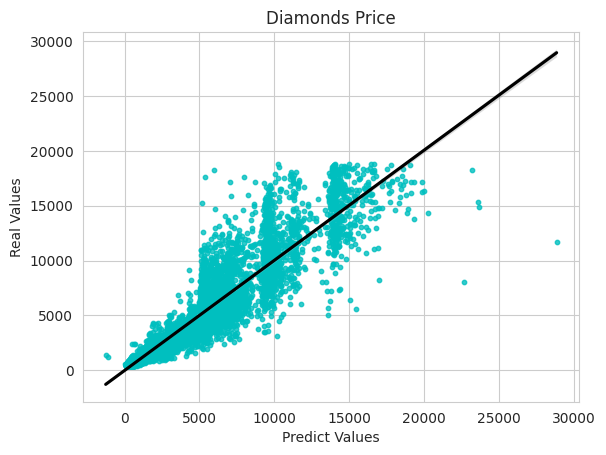

In [ ]:
sns.regplot(x = y_pred, y = y_real, scatter_kws={'s': 10},color='c', line_kws={'color': 'k'})
plt.xlabel('Predict Values')
plt.ylabel('Real Values')
plt.title('Diamonds Price')

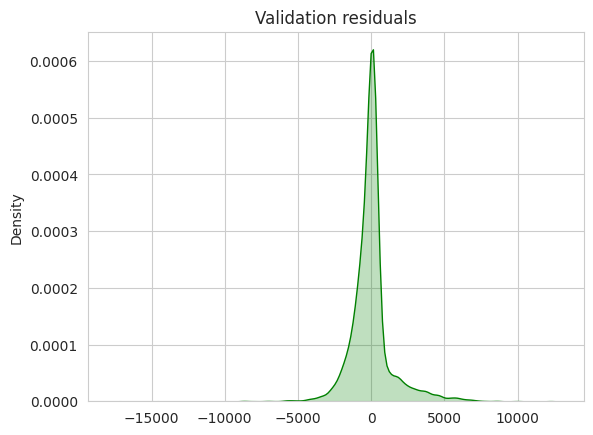

In [ ]:
import seaborn as sns
error_  = y_real - y_pred
sns.kdeplot(x=y_real.flatten()- y_pred, fill=True, color='green')
plt.title('Validation residuals')
plt.show()

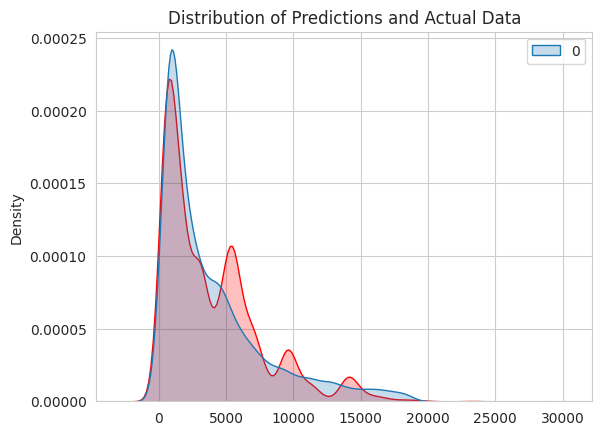

In [ ]:
sns.kdeplot(y_pred, color='r', fill=True)
sns.kdeplot(y_real, color='b', fill=True)
plt.title('Distribution of Predictions and Actual Data')
plt.show()

### **Prediction**

In [ ]:
df_Diamonds.iloc[5578]

carat       0.76
cut        Ideal
color          E
clarity      VS2
depth       61.6
table       56.0
price       3864
x           5.85
y            5.9
z           3.62
Name: 5583, dtype: object

In [ ]:
new_model.predict([[0.76,3.62]])

array([3335.57776559])

$$ price=3170.410 + 10976.82\cdot carat -2258.90 \cdot z $$

## **Second Model**

### **Libraries**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error
import math

### **Dataframe**

In [ ]:
df_Diamonds_2 = dfDiamonds.copy()
df_Diamonds_2.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [ ]:
df_Diamonds_2.describe()

carat         depth         table         price             x  \
count  53920.000000  53920.000000  53920.000000  53920.000000  53920.000000   
mean       0.797698     61.749514     57.456834   3930.993231      5.731627   
std        0.473795      1.432331      2.234064   3987.280446      1.119423   
min        0.200000     43.000000     43.000000    326.000000      3.730000   
25%        0.400000     61.000000     56.000000    949.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5323.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53920.000000  53920.000000  
mean       5.734887      3.540046  
std        1.140126      0.702530  
min        3.680000      1.070000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

### **Clean Data**

In [ ]:
df_Diamonds_2 = df_Diamonds_2[(df_Diamonds_2["depth"] < 75) & (df_Diamonds_2["depth"] > 45)]
df_Diamonds_2 = df_Diamonds_2[(df_Diamonds_2["table"] < 80) & (df_Diamonds_2["table"] > 40)]
df_Diamonds_2 = df_Diamonds_2[df_Diamonds_2["x"] < 30]
df_Diamonds_2 = df_Diamonds_2[df_Diamonds_2["y"] < 30]
df_Diamonds_2 = df_Diamonds_2[(df_Diamonds_2["z"] < 30) & (df_Diamonds_2["z"] > 2)]
print(df_Diamonds_2.shape)

(53907, 10)


In [ ]:
s = (df_Diamonds_2.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
encoder_data = df_Diamonds_2.copy()
label_encoder = LabelEncoder()
for col in object_cols:
    encoder_data[col] = label_encoder.fit_transform(encoder_data[col])
encoder_data.head()

Categorical variables:
['cut', 'color', 'clarity']


carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    2      1        3   61.5   55.0    326  3.95  3.98  2.43
1   0.21    3      1        2   59.8   61.0    326  3.89  3.84  2.31
2   0.23    1      1        4   56.9   65.0    327  4.05  4.07  2.31
3   0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63
4   0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75

### **Model**

In [ ]:
inputs2 = ['carat','color', 'clarity','z']
output2= ['price']
print(encoder_data.columns)

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')


In [ ]:
scores_2 = []
for k in range(10):
    dfTrain2, dfTest2 = train_test_split(encoder_data, test_size= 0.2, random_state = k+1)
    rf = RandomForestRegressor()
    rf.fit(dfTrain2[inputs2],dfTrain2[output2])
    scores_2.append(rf.score(dfTest2[inputs2],dfTest2[output2]))

<ipython-input-114-883a283c19a1>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(dfTrain2[inputs2],dfTrain2[output2])
<ipython-input-114-883a283c19a1>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(dfTrain2[inputs2],dfTrain2[output2])
<ipython-input-114-883a283c19a1>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(dfTrain2[inputs2],dfTrain2[output2])
<ipython-input-114-883a283c19a1>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(dfTrain2[inputs2],dfTrain2[output2])
<ipython-input-114-883a283c19a1>:5: DataConversionWa

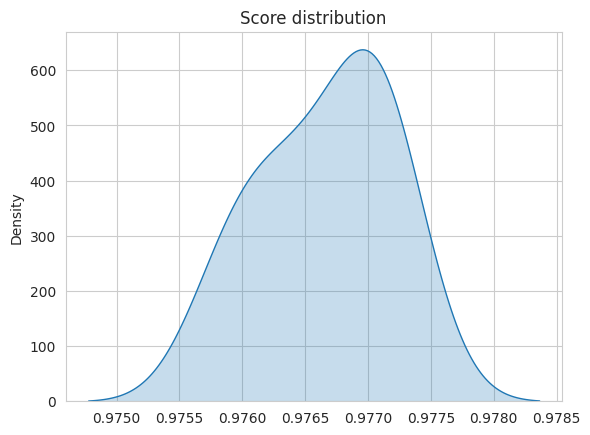

In [ ]:
sns.kdeplot(x=scores_2, fill=True,)
plt.title('Score distribution')
plt.show()

In [ ]:
score_final2 = np.mean(np.array(scores_2))
print(f'Final Score: {score_final2}')

Final Score: 0.9766574044909003


### **Metrics and Features**

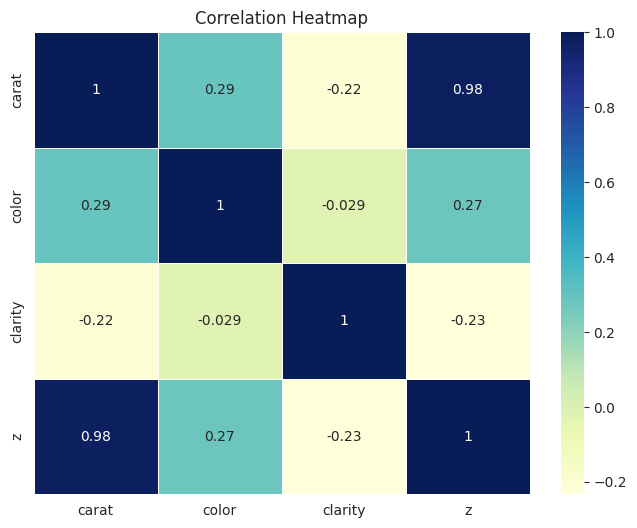

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(dfTrain2[inputs2].corr(), annot=True, cmap='YlGnBu', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
y_pred2 = rf.predict(dfTest2[inputs2]).flatten()
y_real2 = dfTest2[output2].values
print(f'Score: {rf.score(dfTest2[inputs2],y_real2)}')
print(f'Mean Square Error (MSE): {mean_squared_error(y_real2, y_pred2)}')
print(f'Root Mean Square Error (RMSE): {math.sqrt(mean_squared_error(y_real2, y_pred2))}')
print()

Score: 0.977059061104242
Mean Square Error (MSE): 373085.6533106954
Root Mean Square Error (RMSE): 610.8073782385862



### **Graphs**

Text(0.5, 1.0, 'Diamonds Price')

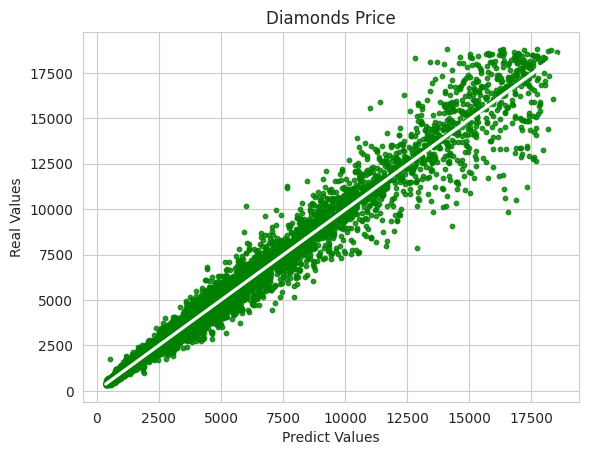

In [ ]:
sns.regplot(x = y_pred2, y = y_real2, scatter_kws={'s': 10}, color='green', line_kws={'color': 'white'})
plt.xlabel('Predict Values')
plt.ylabel('Real Values')
plt.title('Diamonds Price')

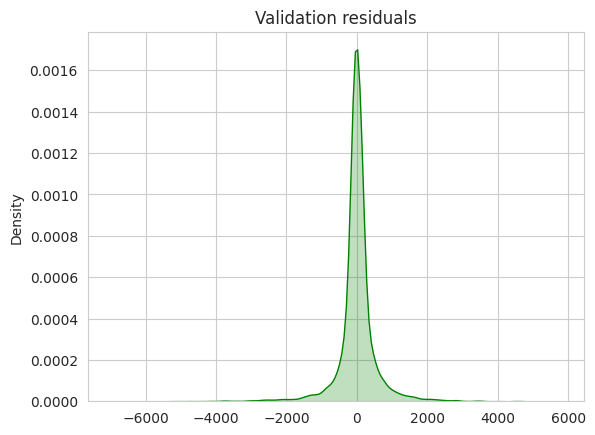

In [ ]:
import seaborn as sns
error_2  = y_real2.flatten() - y_pred2
sns.kdeplot(x=error_2, fill=True, color='green')
plt.title('Validation residuals')
plt.show()

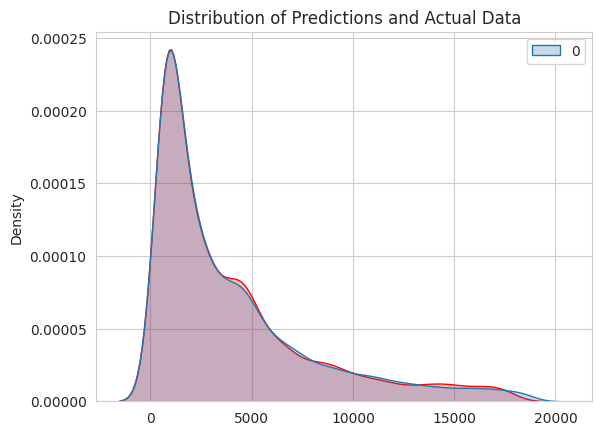

In [ ]:
sns.kdeplot(y_pred2, color='r', fill=True)
sns.kdeplot(y_real2, color='b', fill=True)
plt.title('Distribution of Predictions and Actual Data')
plt.show()

### **Prediction**

In [ ]:
encoder_data.iloc[5567]

carat         1.14
cut           3.00
color         6.00
clarity       3.00
depth        60.40
table        59.00
price      3861.00
x             6.80
y             6.74
z             4.09
Name: 5572, dtype: float64

In [ ]:
rf.predict([[1.14, 6.00, 3.00, 4.09]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([3991.62])

### **Objectives**


* Identificar qué variables (dimensiones y características) explican en mayor medida el comportamiento del precio de los diamantes para construir el modelo predictivo y entender cómo afectan estas.

* Comparar distintos modelos para determinar cuál ofrece la mejor precisión.

* Poder tener un impacto en el análisis del mercado de diamantes al permitir evaluar su precio de una forma más eficaz.

### **Details of the election**

Primero, limpiamos los datos para eliminar los diamantes adimensionales. Basándonos en el análisis inicial, elegimos un modelo de regresión lineal debido a la alta correlación entre el precio y muchas de las variables, considerando que podría existir una relación lineal y el precio es una variable continua. Seleccionamos carat y x como nuestras variables del modelo.

(Mostramos Precio = t0 +)

Optamos por carat y z porque, en nuestra opinión y según nuestro análisis descriptivo, son las variables que más caracterizan el precio de los diamantes. Carat representa el peso del diamante y z la profundidad. Según nuestra investigación, a mayor peso y profundidad del diamante, mayor es su costo. Descartamos las otras dimensiones (x, y) porque al incluirlas en el modelo junto con carat y x, se observó una alta correlación entre ellas y el resultado del modelo no variaba significativamente. Por tanto, seleccionamos la variable que tenía una mayor influencia en el modelo entre las tres dimensiones. En esta primera parte del análisis, no utilizamos las variables categóricas del conjunto de datos porque consideramos que no son altamente relevantes en este contexto.






$$ price=533.90+9399.81\cdot carat - 1158.90 \cdot z $$

### **Validation method and metrics employed**


Para el proceso de validación del modelo utilizado, se empleó la técnica de cross-validation con el fin de detectar problemas como el overfitting o selection bias. Se dividieron los datos en conjuntos de entrenamiento y prueba, con una proporción de 80-20 respectivamente. En primer lugar, se ajustó un modelo de regresión lineal utilizando los datos de entrenamiento y posteriormente se validó el modelo obtenido utilizando los datos de prueba para evaluar su desempeño frente a datos no vistos durante el entrenamiento del modelo.

(Mostramos grafica. La pediente es el r2.)

Para evaluar principalmente la capacidad predictiva y el desempeño del modelo, se utilizó como métrica el score o el coeficiente de determinación R2 para analizar la correlación entre las predicciones del modelo y los datos reales. Consideramos que esta es la mejor medida, ya que proporciona una idea de la calidad del ajuste del modelo a los datos. Además, se obtuvieron el MSE y RMSE para evaluar qué tan cercanas están las predicciones del modelo a los valores reales.

(mostrar r2, mse, rmse)


### **Preliminary conclusions**

* Se puede establecer al observar el score que el modelo es bueno y describe en gran medida la variabilidad del precio.

* Se destaca que con las otras medidas se observa que el modelo no es el más preciso; las predicciones del precio no son exactas y tienen un margen en el cual puede diferir el valor predicho del real.

* Después de muchas pruebas, se ha determinado que la variable que más influye en el modelo son los quilates.

* Se observa un patrón en el cual para predecir precios relativamente bajos de los diamantes, el modelo hace un trabajo mucho mejor que para precios altos, donde se ve menor precisión.

* Es fundamental evaluar qué tan significativa sería la diferencia entre los valores reales y predichos para su uso práctico en el mercado. Si no se necesita una precisión exacta, se podría describir el precio del diamante de esta manera adecuadamente.



## **Second Model RN Model**

### **Libraries**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
import math
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder

### **Dataframe**

In [ ]:
df_Diamonds_2R = dfDiamonds.copy()
df_Diamonds_2R.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [ ]:
df_Diamonds_2R.describe()

carat         depth         table         price             x  \
count  53920.000000  53920.000000  53920.000000  53920.000000  53920.000000   
mean       0.797698     61.749514     57.456834   3930.993231      5.731627   
std        0.473795      1.432331      2.234064   3987.280446      1.119423   
min        0.200000     43.000000     43.000000    326.000000      3.730000   
25%        0.400000     61.000000     56.000000    949.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5323.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53920.000000  53920.000000  
mean       5.734887      3.540046  
std        1.140126      0.702530  
min        3.680000      1.070000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

### **Clean Data**

In [ ]:
df_Diamonds_2R = df_Diamonds_2R[(df_Diamonds_2R["depth"] < 75) & (df_Diamonds_2R["depth"] > 45)]
df_Diamonds_2R = df_Diamonds_2R[(df_Diamonds_2R["table"] < 80) & (df_Diamonds_2R["table"] > 40)]
df_Diamonds_2R = df_Diamonds_2R[df_Diamonds_2R["x"] < 30]
df_Diamonds_2R = df_Diamonds_2R[df_Diamonds_2R["y"] < 30]
df_Diamonds_2R = df_Diamonds_2R[(df_Diamonds_2R["z"] < 30) & (df_Diamonds_2R["z"] > 2)]
print(df_Diamonds_2R.shape)

(53907, 10)


In [ ]:
s = (df_Diamonds_2R.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
label_encoder = LabelEncoder()
for col in object_cols:
    df_Diamonds_2R[col] = label_encoder.fit_transform(df_Diamonds_2R[col])
df_Diamonds_2R.head()

Categorical variables:
['cut', 'color', 'clarity']


carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    2      1        3   61.5   55.0    326  3.95  3.98  2.43
1   0.21    3      1        2   59.8   61.0    326  3.89  3.84  2.31
2   0.23    1      1        4   56.9   65.0    327  4.05  4.07  2.31
3   0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63
4   0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75

### **Model**

In [ ]:
inputs2R = ['carat', 'cut', 'color', 'clarity','z']
output2R= ['price']
print(df_Diamonds_2R.columns)

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')


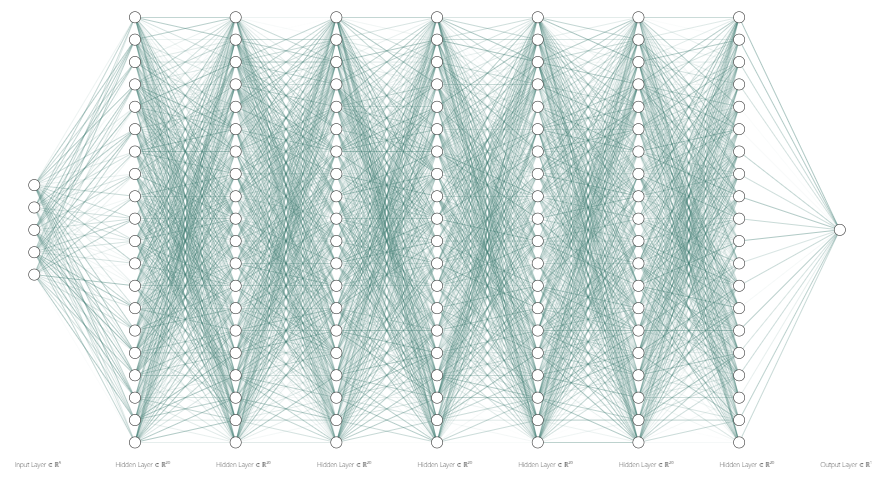

In [ ]:
scores_2R = []
for k in range(5):
    dfTrain2R, dfTest2R = train_test_split(df_Diamonds_2R, test_size= 0.2, random_state = k+1)
    mlp_ = MLPRegressor(hidden_layer_sizes=(20,20,20,20,20,20,20), activation='relu', max_iter=600)
    mlp_.fit(dfTrain2R[inputs2R],dfTrain2R[output2R])
    scores_2R.append(mlp_.score(dfTest2R[inputs2R],dfTest2R[output2R]))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed w

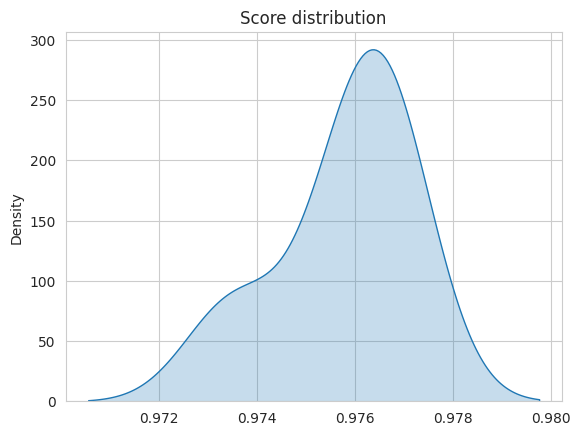

In [ ]:
sns.kdeplot(x=scores_2R, fill=True)
plt.title('Score distribution')
plt.show()

In [ ]:
score_final2R = np.mean(np.array(scores_2R))
print(f'Final Score: {score_final2R}')

Final Score: 0.9757756068141799


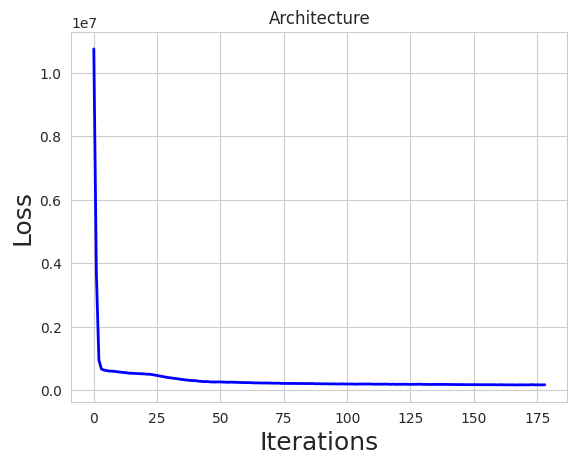

In [ ]:
plt.plot(mlp_.loss_curve_, '-b', lw=2)
plt.xlabel('Iterations', fontdict={'size':18})
plt.ylabel('Loss', fontdict={'size':18})
plt.title('Architecture')
plt.show()

### **Metrics and Features**

<Axes: >

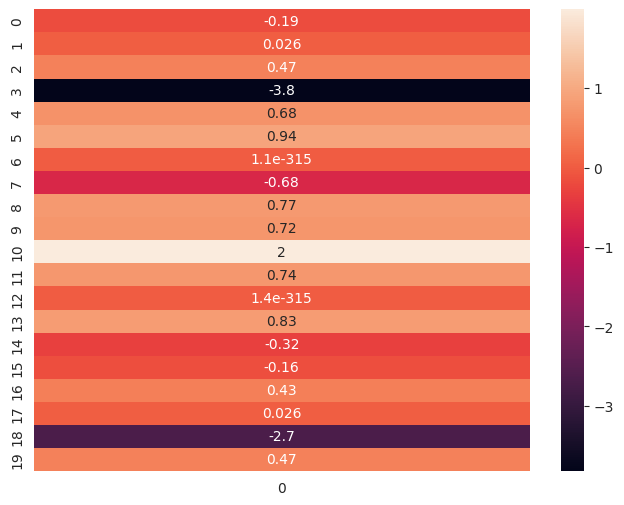

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(mlp_.coefs_[7], annot=True)
plt.titlle('Weights between last layer and output')
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

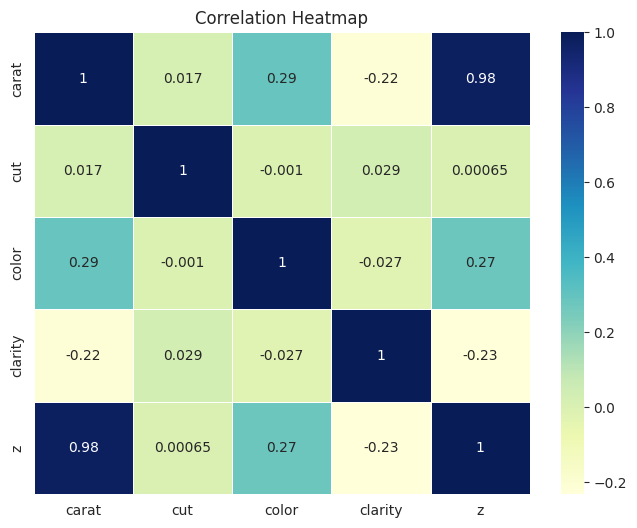

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(dfTrain2R[inputs2R].corr(), annot=True, cmap='YlGnBu', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
y_pred2R = mlp_.predict(dfTest2R[inputs2R]).flatten()
y_real2R = dfTest2R[output2R].values
print(f'Score: {mlp_.score(dfTest2R[inputs2R],y_real2R)}')
print(f'MSE: {mean_squared_error(y_real2R, y_pred2R)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_real2R, y_pred2R))}')

Score: 0.9732241981824183
MSE: 427736.75024775224
RMSE: 654.0158639113827


### **Graphs**

Text(0.5, 1.0, 'Diamonds Price')

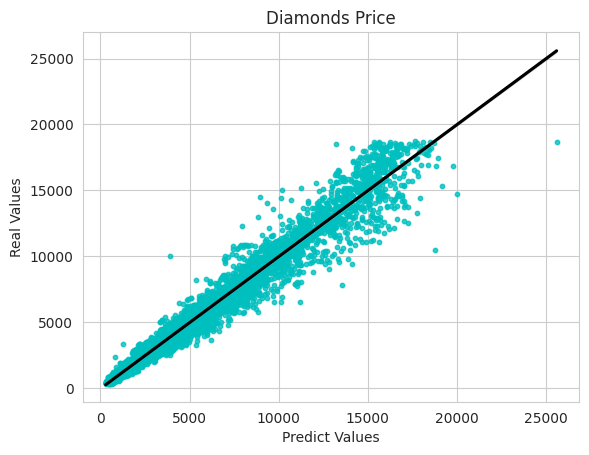

In [ ]:
sns.regplot(x = y_pred2R, y = y_real2R, scatter_kws={'s': 10},color='c', line_kws={'color': 'k'})
plt.xlabel('Predict Values')
plt.ylabel('Real Values')
plt.title('Diamonds Price')

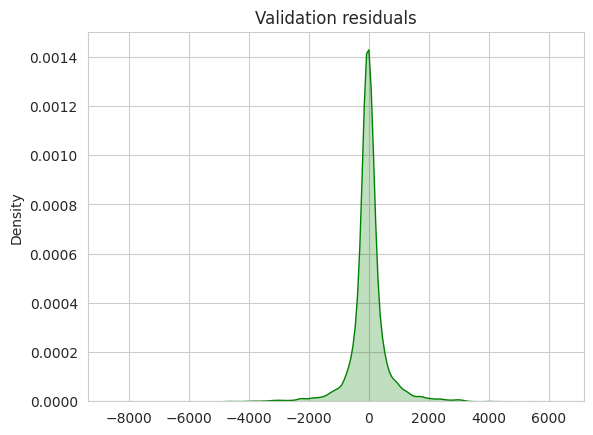

In [ ]:
import seaborn as sns
error_2R  = y_real2R - y_pred2R
sns.kdeplot(x=y_real2R.flatten()- y_pred2R, fill=True, color='green')
plt.title('Validation residuals')
plt.show()

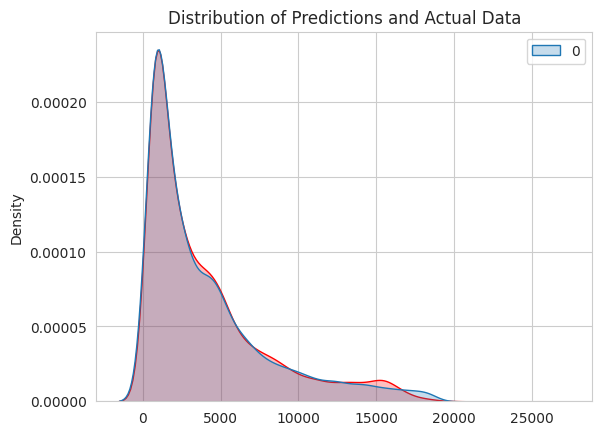

In [ ]:
sns.kdeplot(y_pred2R, color='r', fill=True)
sns.kdeplot(y_real2R, color='b', fill=True)
plt.title('Distribution of Predictions and Actual Data')
plt.show()

### **Prediction**

In [ ]:
df_Diamonds_2R.iloc[58]

carat        0.30
cut          4.00
color        5.00
clarity      2.00
depth       63.00
table       57.00
price      405.00
x            4.28
y            4.32
z            2.71
Name: 58, dtype: float64

In [ ]:
mlp_.predict([[0.3,4, 5,2,2.71]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


array([615.96877511])